In [1]:
#https://towardsdatascience.com/music-in-python-2f054deb41f4

In [229]:
%cd harmonics/

[Errno 2] No such file or directory: 'harmonics/'
/home/matias/HDD/Dropbox/apps/harmonics/harmonics


In [310]:
import scipy
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
import pandas as pd
from scipy.signal import find_peaks
import harmonics as h
import audio as a
from importlib import reload
reload(h)
reload(a)
import time
#import pyaudio

from IPython.display import Audio
from scipy import fftpack

In [4]:
Audio('../data/OUTPUT_WAV/milesguitar_mag_phase.wav',autoplay=True)

In [5]:
s,d = wavfile.read('../data/SAMPLES/g2.wav')

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

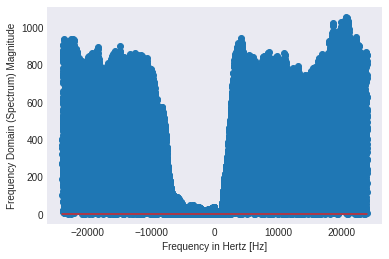

In [6]:
s,d = wavfile.read('../data/SAMPLES/flute_A.wav')

X = fftpack.fft(d)
freqs = fftpack.fftfreq(len(d)) * s
freqs

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(d))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')

Audio shape: (2846678,), Sliced audio shape: (28457, 1024)
Shape of `slices`: (1024, 28457)


(0.0, 6.0)

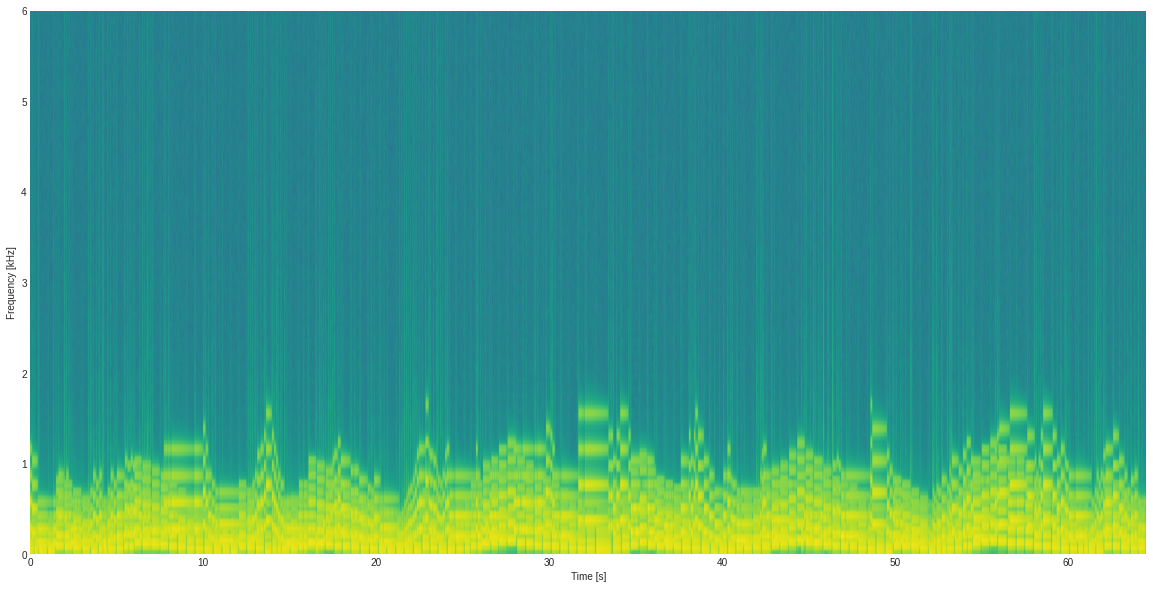

In [9]:
from skimage import util

M = 1024
rate,audio = wavfile.read('../data/OUTPUT_WAV/milesguitar_mag_phase.wav')
    
slices = util.view_as_windows(audio, window_shape=(M,), step=100)
print(f'Audio shape: {audio.shape}, Sliced audio shape: {slices.shape}')

win = np.hanning(M + 1)[:-1]
slices = slices * win

slices = slices.T
print('Shape of `slices`:', slices.shape)

spectrum = np.fft.fft(slices, axis=0)[:M // 2 + 1:-1]
spectrum = np.abs(spectrum)

f, ax = plt.subplots(figsize=(20,10))

S = np.abs(spectrum)
S = 20 * np.log10(S / np.max(S))
N = len(audio)
L = N/rate
ax.imshow(S, origin='lower', cmap='viridis',
          extent=(0, L, 0, rate / 2 / 1000))
ax.axis('tight')
ax.set_ylabel('Frequency [kHz]')
ax.set_xlabel('Time [s]')
ax.set_ylim((0,6))

In [ ]:
s = a.Sampler()
s.extract('../data/SAMPLES/g2.wav')
s.extract('../data/SAMPLES/bass_al.wav')

In [ ]:
test('milesguitar_mag_phase_no_stretch.wav')

In [ ]:
[(a,b) for a,b in s.analyzed.rel_harmonics.values[0]]

In [ ]:
s.overtones,s.enveloppe = 0,0

In [ ]:
s.frequency = 217

In [ ]:
s.amplitude=2000

In [12]:
np.random.choice([10,20],size=10)

array([20, 10, 20, 20, 10, 20, 20, 20, 20, 10])

In [ ]:
s.df.enveloppe[0]

In [ ]:
w.set_overtones(0)
w.set_enveloppe(False)

In [ ]:
w.analyzed

In [ ]:
s.get_wave(1,freq=217)

In [ ]:
import time

In [14]:
def f():
    return

In [26]:
np.array([True,False,True])*1

array([1, 0, 1])

In [25]:
sum(np.array([True]))

1

In [27]:
seq = np.array([1,2,5,3,-9,5])

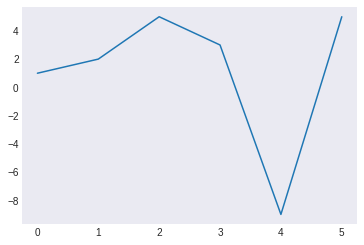

In [28]:
plt.plot(seq)

In [89]:
98, 107,  85 , 11  , 7  ,19 , 12 , 23

array([1, 1, 1, 4])

In [135]:
seq = np.sort(np.diff(np.unique((np.array([60,62,64,65,67])%12-67%12)%12)))
interv = np.array([1, 1, 2, 2, 2, 2])
m = len(seq)
n = len(interv)
str(seq)

'[1 2 2 5]'

In [137]:
True * 1

1

In [134]:
import random
random.choice([0,1,2,3,],si)

2

In [130]:
%timeit 

8.12 µs ± 91.9 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
def test(filename='milesguitar.wav'):
    start = time.time()

    s.overtones,s.enveloppe = 0,0
    w=s

    t = h.Tune('../data/weimar_jazz_database/RELEASE2.0_mid_unquant/MilesDavis_SoWhat_FINAL.mid')
    t2 = h.Tune('../data/jazzbasslines/MilesDavis_SoWhat_Solo_bass.mid')

    df = t.df[(t.df.type == 'note_on')][['beat_time','data1']]

    df['freq'] = np.array([h.Note(i).pitch.frequency for i in df.data1])

    df['duration'] = np.array(list(np.diff(df.beat_time.values)) + [1])/4

    a = [w.get_wave(d,freq=f,overtones=0,enveloppe=0,plot=False,wav=False) for d,f in zip(df.duration.to_numpy(),df.freq.to_numpy()/2)]
    a = np.concatenate(a)
    #a += np.concatenate([w.get_wave(d,freq=f,plot=False,wav=False) for d,f in zip(df.duration.to_numpy(),df.freq.to_numpy()*2/1.7)])



    df = t2.df[(t2.df.type == 'note_on')][['beat_time','data1']]

    df['freq'] = np.array([h.Note(i).pitch.frequency for i in df.data1])

    df['duration'] = np.array(list(np.diff(df.beat_time.values)) + [1])/2.3336139528250124

    b = [w.get_wave(d,freq=f,overtones=1,enveloppe=1,plot=False,wav=False) for d,f in zip(df.duration.to_numpy(),df.freq.to_numpy())]
    b = np.concatenate(b)
    #b += np.concatenate( [w.get_wave(d,freq=f,plot=False,wav=False) for d,f in zip(df.duration.to_numpy(),
    #                                                                               df.freq.to_numpy()*2/1.7)] )

    A = a + b[:-1] 
    print(f"Took {start - time.time()}")
    wavfile.write(filename, rate=44100, data=A.astype(np.int16))


In [151]:
np.sort(np.hstack([np.arange(i+30,80,12) for i in [0,2,4,5,7,9,11]]))

array([30, 32, 34, 35, 37, 39, 41, 42, 44, 46, 47, 49, 51, 53, 54, 56, 58,
       59, 61, 63, 65, 66, 68, 70, 71, 73, 75, 77, 78])

In [205]:
arr = np.array([65,60,65,60,65,60,60])



[False, True, False]

added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics
added harmonics


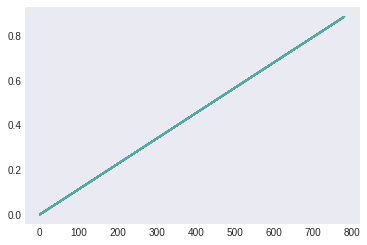

In [314]:
midi = [int(i) for i in '71 65 67 71 67 65 64 60 62 65 64 65 60 62 67 65 67 62 69 71'.split(' ')]
midi = [62, 57, 55, 55, 53, 52, 57, 62, 64, 62, 60, 60, 60, 60, 59, 59, 59,
         55, 60, 62]
note_dur = np.array([0.5,0.5,0.5,0.33,1,1,1,2])/3
rest = np.array(note_dur.tolist()+[0]*len(note_dur))/8
frequencies = np.array([h.Note(i).pitch.frequency for i in midi])
a = [s.get_wave(i,freq=f,harmonics=0,enveloppe=0,plot=False,wav=False) for i,f in zip(np.random.choice(note_dur,size=len(frequencies)),
                                                                                      frequencies*2)]
rests = np.random.choice(rest,len(a))
rests = [np.zeros(int(44100*i)) for i in rests]
a = np.concatenate([np.concatenate((i,j)) for i,j in zip(a,rests)])
Audio(rate=44100, data=a.astype(np.int16),autoplay=True)

In [319]:
wavfile.write('../data/OUTPUT_WAV/g.wav',rate=44100,data=a.astype(np.int16))

In [322]:
%ls '../data/OUTPUT_WAV/'

bassline.wav          guitar.wav          milesguitar_mag_phase.wav
canonball_sowhat.wav  g.wav               milesguitar_mag.wav
counterblues.wav      melody.wav          milesguitar_real.wav
dolikemiles.wav       milesbassflute.wav  pure_c.wav


In [253]:
df = pd.DataFrame({'ljklj':[0,1,2,3],
                  'a':[0,0,5,0]})

In [260]:
df.sort_values('a',inplace=True,ascending=False)

In [263]:
df.a.tolist()[:2]

[5.1, 0.1]

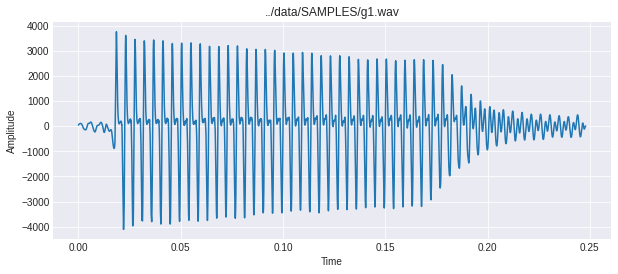

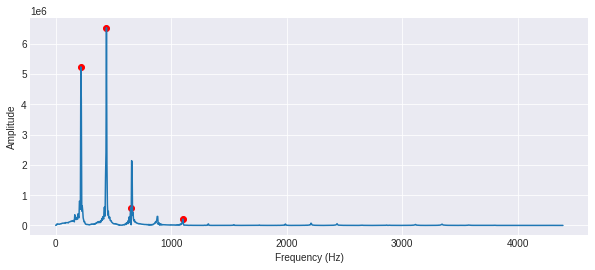

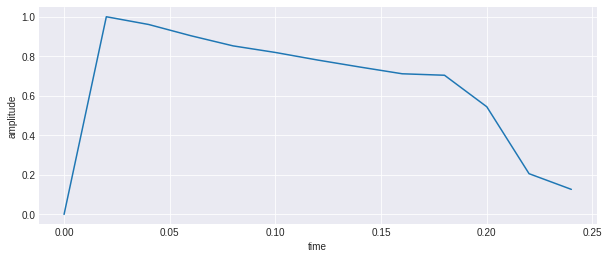

In [311]:
s = a.Sampler()
s.extract('../data/SAMPLES/g1.wav')

In [138]:
np.diff([1,2,3,4,5,6])

array([1, 1, 1, 1, 1])